## *사용상 부주의로 인한 책임은 사용자에게 있습니다*
# kw_condition
 - [키움증권 조건검색 유튜브 가이드](https://www.youtube.com/watch?v=THCpQya4bXE&t=189s&ab_channel=%EC%B0%BD%EC%9B%90%EA%B0%9C%EB%AF%B8TV)

## 개발 환경  
 - 설치 Python 3.9.13 32bit
 - PySide2 5.15 >= (poetry 패키지 툴로 자동 설치)
 - 설치 [키움증권 Open API+](https://www.kiwoom.com/h/customer/download/VOpenApiInfoView?dummyVal=0)  
 - 파이썬 패키지 관리툴 poetry 로 패키지 자동 설치 ([가이드](https://python-poetry.org/docs/basic-usage/))
 

 ## 개발 문서  
 - [키움 오픈 API pdf 매뉴얼](https://download.kiwoom.com/web/openapi/kiwoom_openapi_plus_devguide_ver_1.5.pdf)

## 참고 소스 
 - from https://github.com/sculove/QWebview-plus
 - from https://github.com/elbakramer/koapy


## 개발 환경 설정 
~~~~
# poetry 설치 (using pipx)
> python -m pip install pipx
> python -m pipx ensurepath
> pipx install poetry

# poetry virtualenv 환경, 프로젝트 내부 경로로 설정 
> poetry config virtualenvs.in-project true
> poetry config virtualenvs.path "./.venv"

# poetry 32bit python 사용토록 설정
> poetry env use /path/to/32bit_python/python.exe

# 종속 패키지 설치 
> poetry install
~~~~

## 사용 방법


 ### 0. python 실행 경로 확인 
    - python 가상 환경을 사용 중이라면 가상 환경의 path 가 맞는지 확인한다. 


In [1]:
%gui qt5
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import logging

log = logging.getLogger('kw')
handler = logging.StreamHandler()
log.setLevel(logging.DEBUG)
handler.setFormatter(logging.Formatter( '%(asctime)s [%(levelname)s] %(message)s - %(name)s:%(funcName)s:%(lineno)d' ) )
log.addHandler( handler ) 

import sys
print(sys.executable)

d:\1git\kw_condition\.venv\Scripts\python.exe


### 1. 객체 생성

In [2]:
from kw_condition import KiwoomOpenApiPlus
from kw_condition.utils import common_util

from PySide2.QtWidgets import QApplication

myApp = None
if isinstance(QApplication.instance(), type(None)):
    log.debug('make instance')
    myApp = QApplication([])
else:
    log.debug("use already")
    myApp = QApplication.instance()

kw_obj = KiwoomOpenApiPlus()

2022-09-07 16:58:10,984 [DEBUG] make instance - kw:<cell line: 7>:8


### 2. 서버접속
* 자동로그인이 설정되어 있는 경우 로그인이 자동으로 처리 되며, 그렇지 않은 경우 팝업 창에서 수동으로 아이디, 비밀번호 정보를 입력해야함 
- TODO
    * 자동 로그인 설정되지 않은 상태서 로그인 정보를 외부에서 입력한 경우 매크로로 자동처리 할수 있도록 해야함 pywinauto

In [3]:
kw_obj.try_connect()
common_util.process_qt_events(kw_obj.is_connected, 60)

2022-09-07 16:58:11,104 [DEBUG]  - kw:try_connect:1191
2022-09-07 16:58:11,125 [DEBUG]  - kw:base_state_entered:307
2022-09-07 16:58:11,126 [DEBUG]  - kw:init_entered:317
2022-09-07 16:58:11,129 [DEBUG]  - kw:sub_state_entered:312
2022-09-07 16:58:11,130 [DEBUG]  - kw:tr_state_entered:364
2022-09-07 16:58:11,131 [DEBUG]  - kw:tr_init_entered:375
2022-09-07 16:58:11,131 [DEBUG]  - kw:order_state_entered:369
2022-09-07 16:58:11,131 [DEBUG]  - kw:order_init_entered:395
2022-09-07 16:58:11,132 [DEBUG]  - kw:disconnected_entered:323
2022-09-07 16:58:14,476 [INFO] 0 - kw:_OnEventConnect:457
2022-09-07 16:58:14,478 [DEBUG]  - kw:connected_entered:329
2022-09-07 16:58:14,480 [INFO] account count: 1, keyboard_boan: 1, firewall: 2 - kw:connected_entered:338
2022-09-07 16:58:14,506 [DEBUG]  - kw:tr_standby_entered:380
2022-09-07 16:58:14,507 [DEBUG]  - kw:order_standby_entered:400


### 3. 서버 접속 상태 확인 

In [4]:
kw_obj.is_connected()

True

### 4. 코드 번호를 통해 종목 이름 확인 

In [5]:
name = "삼성전자"
code = kw_obj.code_by_names[name]
code 

'005930'

### 5. 계좌 정보확인

In [6]:
account_list = kw_obj.get_account_list()

account_num = kw_obj.get_first_account()

### 6. TR (주식기본정보요청) - Single Data

아래 처럼 직접 TR 요청에 필요한 입력값을 설정해 요청하고, 이후 들어오는 이벤트 또한 직접 처리해주는 방식으로 사용할 수 있다.

In [7]:
rqname = '주식기본정보요청'
trcode = 'opt10001'
screen_no = '0001'  # 화면번호, 0000 과 9000 이상을 제외한 4자리 숫자 임의로 지정, screen_no 생략한 경우 임의로 화면 번호 지정 

inputs = {'종목코드': '005930'}

kw_obj.add_transaction(rqname, trcode, inputs, screen_no)

common_util.process_qt_events(kw_obj.has_transaction_result(rqname), 5)

# TR result 를 get 해야 다시 동일 rqname 으로 재요청 가능함 
kw_obj.get_transaction_result(rqname) 


2022-09-07 16:58:14,801 [DEBUG]  - kw:tr_waiting_entered:387
2022-09-07 16:58:14,802 [INFO] {'rqname': '주식기본정보요청', 'trcode': 'opt10001', 'screen_no': '9199', 'prev_next': '0001', 'inputs': {'종목코드': '005930'}} - kw:request_transaction:197
2022-09-07 16:58:14,843 [DEBUG] screen_no: 9199, rq_name: 주식기본정보요청, tr_code: opt10001, record_name: , prev_next: 0 - kw:_OnReceiveTrData:513
2022-09-07 16:58:14,844 [DEBUG] 기준가:                57100 - kw:_OnReceiveTrData:565


['005930', '+74200', '-40000', '57100']

### 7. TR(주식일봉차트조회요청) - Multi Data  

In [8]:
import datetime

rqname = '주식일봉차트조회요청'
trcode = 'opt10081'

current_time_str = datetime.datetime.now().strftime('%Y%m%d')

inputs = {'종목코드': '005930', '기준일자' : current_time_str, "수정주가구분": '1'}

kw_obj.add_transaction(rqname, trcode, inputs)

common_util.process_qt_events(kw_obj.has_transaction_result(rqname), 5)

# result 를 get 해야 다시 동일 rqname 으로 재요청 가능함 

daily_list = kw_obj.get_transaction_result(rqname)
print( len(daily_list) )
daily_list[-5: ] 

2022-09-07 16:58:15,070 [DEBUG]  - kw:tr_standby_entered:380
2022-09-07 16:58:15,072 [DEBUG]  - kw:tr_waiting_entered:387
2022-09-07 16:58:15,074 [INFO] {'rqname': '주식일봉차트조회요청', 'trcode': 'opt10081', 'screen_no': '9198', 'prev_next': 0, 'inputs': {'종목코드': '005930', '기준일자': '20220907', '수정주가구분': '1'}} - kw:request_transaction:197
2022-09-07 16:58:15,153 [DEBUG] screen_no: 9198, rq_name: 주식일봉차트조회요청, tr_code: opt10081, record_name: , prev_next: 2 - kw:_OnReceiveTrData:513
2022-09-07 16:58:15,222 [DEBUG] 거래량:             23395726 - kw:_OnReceiveTrData:565


600


[['', '20200410', '48950', '49250', '48650', '49250', '17839111'],
 ['', '20200409', '49750', '49800', '48700', '49100', '22628058'],
 ['', '20200408', '49600', '49750', '48600', '48600', '25010314'],
 ['', '20200407', '49650', '50200', '49000', '49600', '31524034'],
 ['', '20200406', '47500', '48800', '47250', '48700', '23395726']]

### 7. TR(주식일봉차트조회요청) - Multi Data - 연속 조회 

In [9]:
import datetime

rqname = '주식일봉차트조회요청'
trcode = 'opt10081'

current_time_str = datetime.datetime.now().strftime('%Y%m%d')

inputs = {'종목코드': '005930', '기준일자' : current_time_str, "수정주가구분": '1'}

# 연속 조회시 prev_next 값을 2로 입력한다.  
kw_obj.add_transaction(rqname, trcode, inputs, prev_next=2 )

common_util.process_qt_events(kw_obj.has_transaction_result(rqname), 5)

# result 를 get 해야 다시 동일 rqname 으로 재요청 가능함 
daily_list.extend( kw_obj.get_transaction_result(rqname) ) 
print( len(daily_list) )
daily_list[ -5:]





2022-09-07 16:58:15,346 [DEBUG]  - kw:tr_standby_entered:380
2022-09-07 16:58:15,349 [DEBUG]  - kw:tr_waiting_entered:387
2022-09-07 16:58:15,350 [INFO] {'rqname': '주식일봉차트조회요청', 'trcode': 'opt10081', 'screen_no': '9197', 'prev_next': 2, 'inputs': {'종목코드': '005930', '기준일자': '20220907', '수정주가구분': '1'}} - kw:request_transaction:197
2022-09-07 16:58:15,389 [DEBUG] screen_no: 9197, rq_name: 주식일봉차트조회요청, tr_code: opt10081, record_name: , prev_next: 2 - kw:_OnReceiveTrData:513
2022-09-07 16:58:15,456 [DEBUG] 거래량:              9776550 - kw:_OnReceiveTrData:565


1200


[['', '20171101', '57500', '57500', '56180', '57220', '14510250'],
 ['', '20171031', '54060', '55440', '53500', '55080', '13381550'],
 ['', '20171030', '53780', '54320', '53700', '54040', '8196150'],
 ['', '20171027', '52400', '53320', '52140', '53080', '7392500'],
 ['', '20171026', '53720', '53900', '52400', '52400', '9776550']]

### 8. 일봉 차트 출력 샘플

d:\1git\kw_condition\.venv\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


             Open   High    Low  Close    Volume
Date                                            
2017-10-26  53720  53900  52400  52400   9776550
2017-10-27  52400  53320  52140  53080   7392500
2017-10-30  53780  54320  53700  54040   8196150
2017-10-31  54060  55440  53500  55080  13381550
2017-11-01  57500  57500  56180  57220  14510250


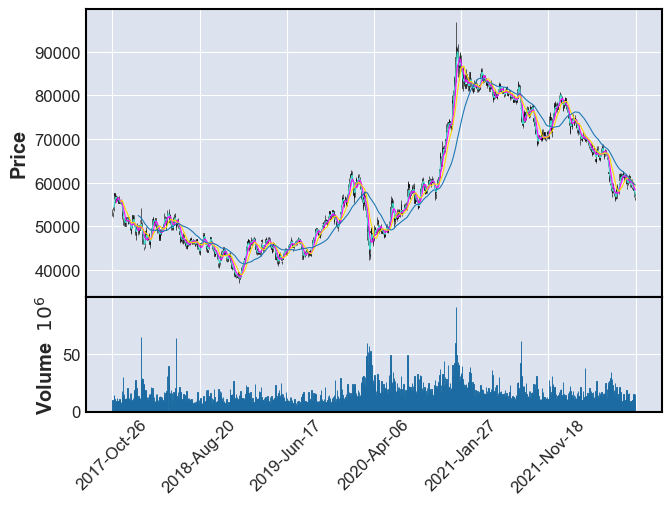

In [10]:
import mplfinance as mpf

daily_df = pd.DataFrame( daily_list, columns=["StockCode", "Date", "Open", "High", "Low", "Close", "Volume"] ) 

# 일봉 조회의 경우 종목 코드가 2번째 row 부터 공백이므로 삭제 
daily_df.drop(columns='StockCode', axis =1, inplace = True)

# string date -> datetime 
daily_df['Date'] = pd.to_datetime( daily_df['Date'], format = '%Y%m%d') 

# str to int
selected_cols = ["Open", "High", "Low", "Close", "Volume"]
daily_df[ selected_cols ] = daily_df[selected_cols].astype('int')

daily_df = daily_df.set_index('Date')

daily_df = daily_df.sort_values(by= 'Date')

print(daily_df.head(5))

# 5, 10 , 20 , 60 일 평균 선 추가 
mpf.plot(daily_df, type='candle', mav=(5, 10, 20, 60), volume= True)



### 9. 전종목 일봉 Excel 출력
전체 종목의 일봉 데이터를 Excel 로 만든다 

주의사항: 과도한 조회는 오류 팝업 발생 후 재접속 해야 하므로 주의!

In [11]:
import datetime
import pandas as pd
import time

current_time_str = datetime.datetime.now().strftime('%Y%m%d')

for code in kw_obj.code_by_names.values():
    trcode = 'opt10081'
    stock_name = kw_obj.getMasterCodeName( code )
    rqname = '{}: 주식일봉차트조회요청'.format( stock_name ) 

    inputs = {'종목코드': '{}'.format( code ), '기준일자' : current_time_str, "수정주가구분": '1'}

    daily_list = []
    prev_next = 0

    while False:
        kw_obj.add_transaction(rqname, trcode, inputs, prev_next = prev_next)
        common_util.process_qt_events(kw_obj.has_transaction_result(rqname), 5)
        
        has_additional_data = kw_obj.has_transaction_additional_data(rqname)

        # result 를 get 해야 다시 동일 rqname 으로 재요청 가능함 
        daily_list.extend( kw_obj.get_transaction_result(rqname) )

        if( has_additional_data == True ):
            prev_next = 2
        else:

            daily_df = pd.DataFrame( daily_list, columns=["StockCode", "Date", "Open", "High", "Low", "Close", "Volume"] )     

            # 일봉 조회의 경우 종목 코드가 2번째 row 부터 공백이므로 삭제 
            daily_df.drop(columns='StockCode', axis =1, inplace = True)

            # string date -> datetime 
            daily_df['Date'] = pd.to_datetime( daily_df['Date'], format = '%Y%m%d') 

            # str to int
            selected_cols = ["Open", "High", "Low", "Close", "Volume"]
            daily_df[ selected_cols ] = daily_df[selected_cols].astype('int')

            daily_df = daily_df.set_index('Date')

            daily_df = daily_df.sort_values(by= 'Date')

            print(daily_df.head(2))

            # Excel 생성 
            daily_df.to_excel('{}({}).xlsx'.format( stock_name, code ) )
            time.sleep(10)

            break

### 10. TR(계좌평가잔고내역조회요청) - Multi Data 

In [12]:
    rqname = '계좌평가잔고내역요청'
    trcode = 'opw00018'

    inputs = {'계좌번호': kw_obj.get_first_account(), '비밀번호' : '', '비밀번호입력매체구분': '00', '조회구분': '1' }

    kw_obj.add_transaction(rqname, trcode, inputs)

    common_util.process_qt_events(kw_obj.has_transaction_result(rqname), 5)

    # result 를 get 해야 다시 동일 rqname 으로 재요청 가능함 

    jango = kw_obj.get_transaction_result(rqname)
    print( len(jango) )
    jango[-5: ] 

2022-09-07 16:58:18,018 [DEBUG]  - kw:tr_standby_entered:380
2022-09-07 16:58:18,019 [DEBUG]  - kw:tr_waiting_entered:387
2022-09-07 16:58:18,020 [INFO] {'rqname': '계좌평가잔고내역요청', 'trcode': 'opw00018', 'screen_no': '9196', 'prev_next': 0, 'inputs': {'계좌번호': '4175351811', '비밀번호': '', '비밀번호입력매체구분': '00', '조회구분': '1'}} - kw:request_transaction:197
2022-09-07 16:58:18,110 [INFO] screen_no: 9196, rq_name: 계좌평가잔고내역요청, tr_code: opw00018, msg: [100000] 조회가 완료되었습니다 - kw:_OnReceiveMsg:485
2022-09-07 16:58:18,112 [DEBUG] screen_no: 9196, rq_name: 계좌평가잔고내역요청, tr_code: opw00018, record_name: , prev_next:  - kw:_OnReceiveTrData:513
2022-09-07 16:58:18,114 [DEBUG] 현재가: 000000000886 - kw:_OnReceiveTrData:565


2


[['서울식품',
  'A004410',
  '000000000000249',
  '000000000246',
  '000000000000010',
  '000000000000010',
  '000000000242'],
 ['KD',
  'A044180',
  '000000000000966',
  '000000000886',
  '000000000000001',
  '000000000000001',
  '000000000886']]

### 11. 조건 검색 (사용자 설정 조건 리스트 읽기 from HTS)
예시의 정상동작을 위해서는 아래에서 사용되는 조건들과 같은 이름을 가지는 조건들이 미리 저장되어 있어야 한다.

참고로 조건들을 편집하고 저장하는건 영웅문 HTS 내부에서만 가능하기 때문에 따로 HTS 를 열어 편집해주어야 한다.

In [13]:
kw_obj.load_condition_names()
common_util.process_qt_events(kw_obj.has_condition_names, 5)
print( kw_obj.get_condition_names() )


2022-09-07 16:58:18,335 [DEBUG] ret: 1, msg: [OK] 사용자 조건검색식 읽기 - kw:_OnReceiveConditionVer:684
2022-09-07 16:58:18,342 [DEBUG]  - kw:tr_standby_entered:380


{'장초반': 1, '휴식': 2, '장후반': 0, '이탈3': 4, '이탈15': 6, '새조건명': 3, '새조건명2': 5}


### 12. 조건검색 (사용자 조건과 일치하는 종목 리턴)

위에서 서버로부터 조건명을 읽어오면 조건명을 입력하여, 
조건명에 해당하는 종목리스트를 얻어 온다 

In [14]:
condition_name = '장초반'
kw_obj.request_condition(condition_name)
common_util.process_qt_events(kw_obj.has_transaction_result('condition'), 5)
codes = kw_obj.get_transaction_result('condition')
print(codes)



2022-09-07 16:58:18,447 [DEBUG] scrNo: 9195, codeList: 001570;095500;, conditionName: 장초반 index: 1, next: 0 - kw:_OnReceiveTrCondition:721
2022-09-07 16:58:18,450 [INFO] condition list add: 001570 금양 - kw:_OnReceiveTrCondition:731
2022-09-07 16:58:18,451 [INFO] condition list add: 095500 미래나노텍 - kw:_OnReceiveTrCondition:731


['001570', '095500']


### 13. 실시간 조건 검색 

### 14. 주문 처리(시장가 매수)

In [15]:
    request_name = "1주 시장가 신규 매수"  # 사용자 구분명, 구분가능한 임의의 문자열
    account_no = kw_obj.get_first_account()   # 계좌번호 10자리, 여기서는 계좌번호 목록에서 첫번째로 발견한 계좌번호로 매수처리
    order_type = 1  # 주문유형, 1:신규매수
    code = "004410"  # 종목코드, 서울식품 종목코드 (싼거)
    quantity = 1  # 주문수량, 1주 매수
    price = 0  # 주문가격, 시장가 매수는 가격 설정 의미 없으므로 기본값 0 으로 설정
    quote_type = "03"  # 거래구분, 03:시장가
    original_order_no = ""  # 원주문번호, 주문 정정/취소 등에서 사용

    kw_obj.add_order( request_name, account_no, order_type, code, quantity, price, quote_type, original_order_no)
    common_util.process_qt_events(False, 3)

2022-09-07 16:58:18,502 [DEBUG]  - kw:order_waiting_entered:407
2022-09-07 16:58:18,503 [INFO] {'rqname': '1주 시장가 신규 매수', 'screen_no': '9194', 'account_no': '4175351811', 'order_type': 1, 'code': '004410', 'quantity': 1, 'price': 0, 'quote_type': '03', 'original_order_no': ''} - kw:request_order:278
2022-09-07 16:58:18,584 [INFO] screen_no: 9194, rq_name: 1주 시장가 신규 매수, tr_code: KOA_NORMAL_BUY_KP_ORD, msg: [505217] 장종료되었습니다 - kw:_OnReceiveMsg:485
2022-09-07 16:58:18,587 [DEBUG] screen_no: 9194, rq_name: 1주 시장가 신규 매수, tr_code: KOA_NORMAL_BUY_KP_ORD, record_name: , prev_next:  - kw:_OnReceiveTrData:513
2022-09-07 16:58:18,588 [WARNING] TR Receive not implemented!  - kw:_OnReceiveTrData:518
2022-09-07 16:58:18,811 [DEBUG]  - kw:order_standby_entered:400


time out!


### 14. 주문처리(시장가 매도)

In [16]:
    request_name = "1주 시장가 신규 매도"  # 사용자 구분명, 구분가능한 임의의 문자열
    account_no = kw_obj.get_first_account()   # 계좌번호 10자리, 여기서는 계좌번호 목록에서 첫번째로 발견한 계좌번호로 매수처리
    order_type = 2  # 주문유형, 2:신규매도 
    code = "004410"  # 종목코드, 서울식품 종목코드 (싼거)
    quantity = 1  # 주문수량, 1주 매수
    price = 0  # 주문가격, 시장가 매수는 가격 설정 의미 없으므로 기본값 0 으로 설정
    quote_type = "03"  # 거래구분, 03:시장가
    original_order_no = ""  # 원주문번호, 주문 정정/취소 등에서 사용

    kw_obj.add_order( request_name, account_no, order_type, code, quantity, price, quote_type, original_order_no)
    common_util.process_qt_events(False, 3)

2022-09-07 16:58:21,624 [DEBUG]  - kw:order_waiting_entered:407
2022-09-07 16:58:21,625 [INFO] {'rqname': '1주 시장가 신규 매도', 'screen_no': '9193', 'account_no': '4175351811', 'order_type': 2, 'code': '004410', 'quantity': 1, 'price': 0, 'quote_type': '03', 'original_order_no': ''} - kw:request_order:278
2022-09-07 16:58:21,788 [INFO] screen_no: 9193, rq_name: 1주 시장가 신규 매도, tr_code: KOA_NORMAL_SELL_KP_ORD, msg: [505217] 장종료되었습니다 - kw:_OnReceiveMsg:485
2022-09-07 16:58:21,791 [DEBUG] screen_no: 9193, rq_name: 1주 시장가 신규 매도, tr_code: KOA_NORMAL_SELL_KP_ORD, record_name: , prev_next:  - kw:_OnReceiveTrData:513
2022-09-07 16:58:21,792 [WARNING] TR Receive not implemented!  - kw:_OnReceiveTrData:518
2022-09-07 16:58:21,926 [DEBUG]  - kw:order_standby_entered:400


time out!
